Epoch: 293


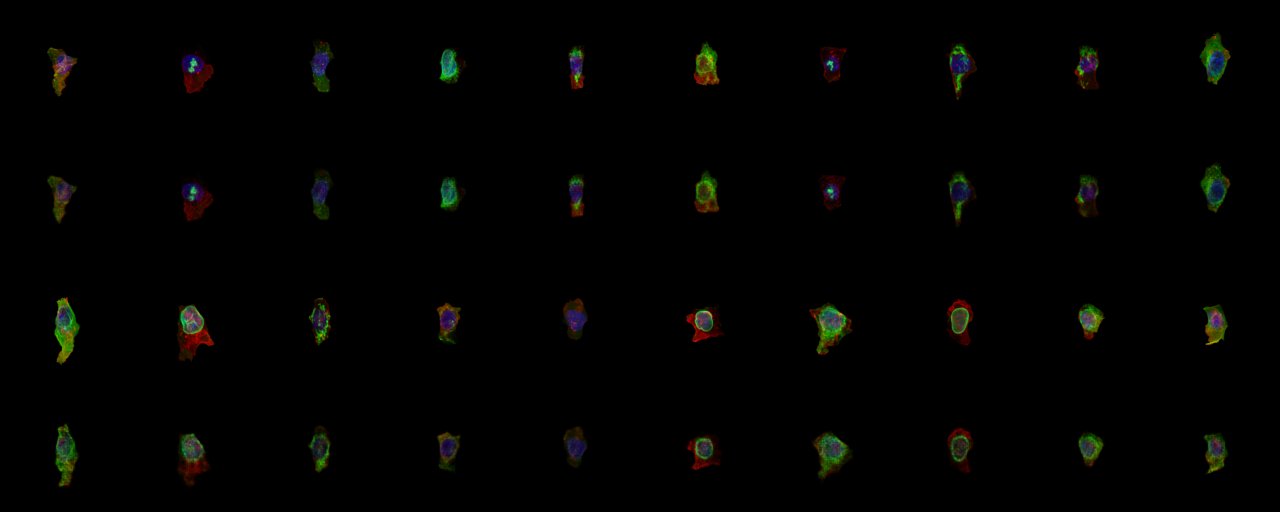

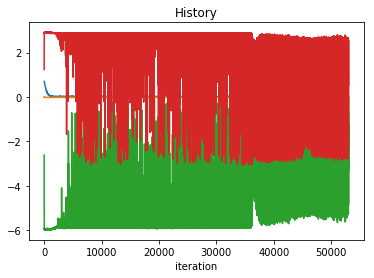

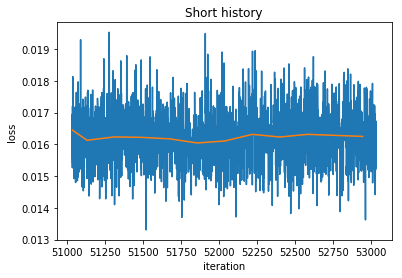

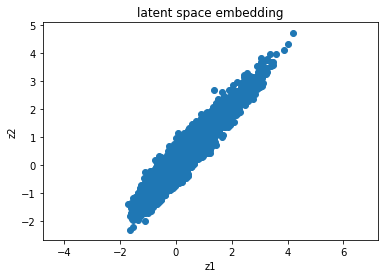

In [58]:
import SimpleLogger as SimpleLogger
import torch
from IPython.core.display import Image, display
import pickle
import matplotlib.pyplot as plt
import numpy as np



from sklearn.neighbors import KernelDensity

import sklearn

%matplotlib inline

model_dir = './waaegan/'
model_dir = './waaegan_128D/'
# model_dir = './waaegan_1E-4/'
# model_dir = './semi_waaegan/'


history = 2000
bw = 100

# opt = pickle.load( open( '{0}/opt.pkl'.format(model_dir), "rb" ) )
logger = pickle.load( open( '{0}/logger_tmp.pkl'.format(model_dir), "rb" ) )
embedding = pickle.load( open('./{0}/embedding_tmp.pkl'.format(model_dir), "rb"))

# print(opt)

epoch = max(logger.log['epoch'])

print('Epoch: ' + str(epoch))

plt.figure(1)
plt.plot(logger.log['iter'], logger.log['reconLoss'])
plt.plot(logger.log['iter'], logger.log['encDLoss'])
plt.plot(logger.log['iter'], logger.log['decDLoss'])
plt.plot(logger.log['iter'], logger.log['minimaxDecDLoss'])
# plt.ylim([-4, 4]) 
plt.title('History')
plt.xlabel('iteration')


x = logger.log['iter'][-history:]
y = logger.log['reconLoss'][-history:]

f = np.ones(bw)/bw
yhat = np.correlate(y-np.mean(y), f, mode='same').tolist() + np.mean(y)


epochs = np.array(logger.log['epoch'][-history:])
losses = np.array(logger.log['reconLoss'][-history:])
iters = np.array(logger.log['iter'][-history:])
uepochs = np.unique(epochs)

epoch_losses = np.zeros(len(uepochs))
epoch_iters = np.zeros(len(uepochs))
i = 0
for uepoch in uepochs:
    inds = np.equal(epochs, uepoch)
    loss = np.mean(losses[inds])
    epoch_losses[i] = loss
    epoch_iters[i] = np.mean(iters[inds])
    i+=1


plt.figure(2)
plt.plot(x, y)
plt.plot(epoch_iters, epoch_losses)

plt.title('Short history')
plt.xlabel('iteration')
plt.ylabel('loss')


plt.figure(3)
plt.scatter(embedding[:,0], embedding[:,1])
plt.xlim([-4, 4]) 
plt.ylim([-4, 4])     
plt.axis('equal')
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('latent space embedding')
# plt.savefig('./{0}/embedding_{1}.png'.format(opt.save_dir, epoch), dpi=75)


im_progress_path = '{0}/progress_{1}.png'.format(model_dir, epoch)
display(Image(im_progress_path, unconfined=True))



In [ ]:
import pdb

epochs = np.array(logger.log['epoch'])
losses = np.array(logger.log['reconLoss'])
iters = np.array(logger.log['iter'])
uepochs = np.unique(epochs)

epoch_losses = np.zeros(len(uepochs))
epoch_iters = np.zeros(len(uepochs))
i = 0
for uepoch in uepochs:
    inds = np.equal(epochs, uepoch)
    loss = np.mean(losses[inds])
    epoch_losses[i] = loss
    epoch_iters[i] = np.mean(iters[inds])
    i+=1
    

In [ ]:
uepochs